In [5]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../../')

from astroLuSt.database_interface import eleanorinterface as aldiei

importlib.reload(aldiei)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')



# EleanorDatabaseInterface

In [9]:
EDI = aldiei.EleanorDatabaseInterface(
    sleep=0,
    n_jobs=3,
    metadata_path="./mastDownload/HLSP",
    clear_metadata=False,
    redownload=True,
    verbose=3,
)

lcs, metas, tpfs, aperture_masks = EDI.download(
    # sectors="all",
    sectors=[40,41],
    source_ids=[{"tic":"159717514"},{"gaia":"2249474965068982272"}],
    # sectors=[23],
    # source_ids=[{"tic":"168709463"}],
    get_normalized_flux=True, normfunc=lambda x, datum: x/np.nanmedian(x[datum.quality == 0]),
    tpfs2store=slice(1), store_aperture_masks=True,
    # tpfs2store=None, store_aperture_masks=True,
    n_chunks=1,
    # targetdata_kwargs=dict(do_pca=True, aperture_mode='small'),
    targetdata_kwargs=dict(do_pca=True),
    # custom_aperture_kwargs=dict(shape='rectangle', h=3, w=4), #in case you want to use a custom aperture
    save_kwargs=dict(directory='../_data/', pd_savefunc='to_parquet', store_metadata=True),
    # save_kwargs=dict(directory=None, pd_savefunc='to_parquet', store_metadata=True),
)


INFO(EleanorDatabaseInterface.download()): Extracting chunk 1/1 (2/2)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   10.3s finished


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


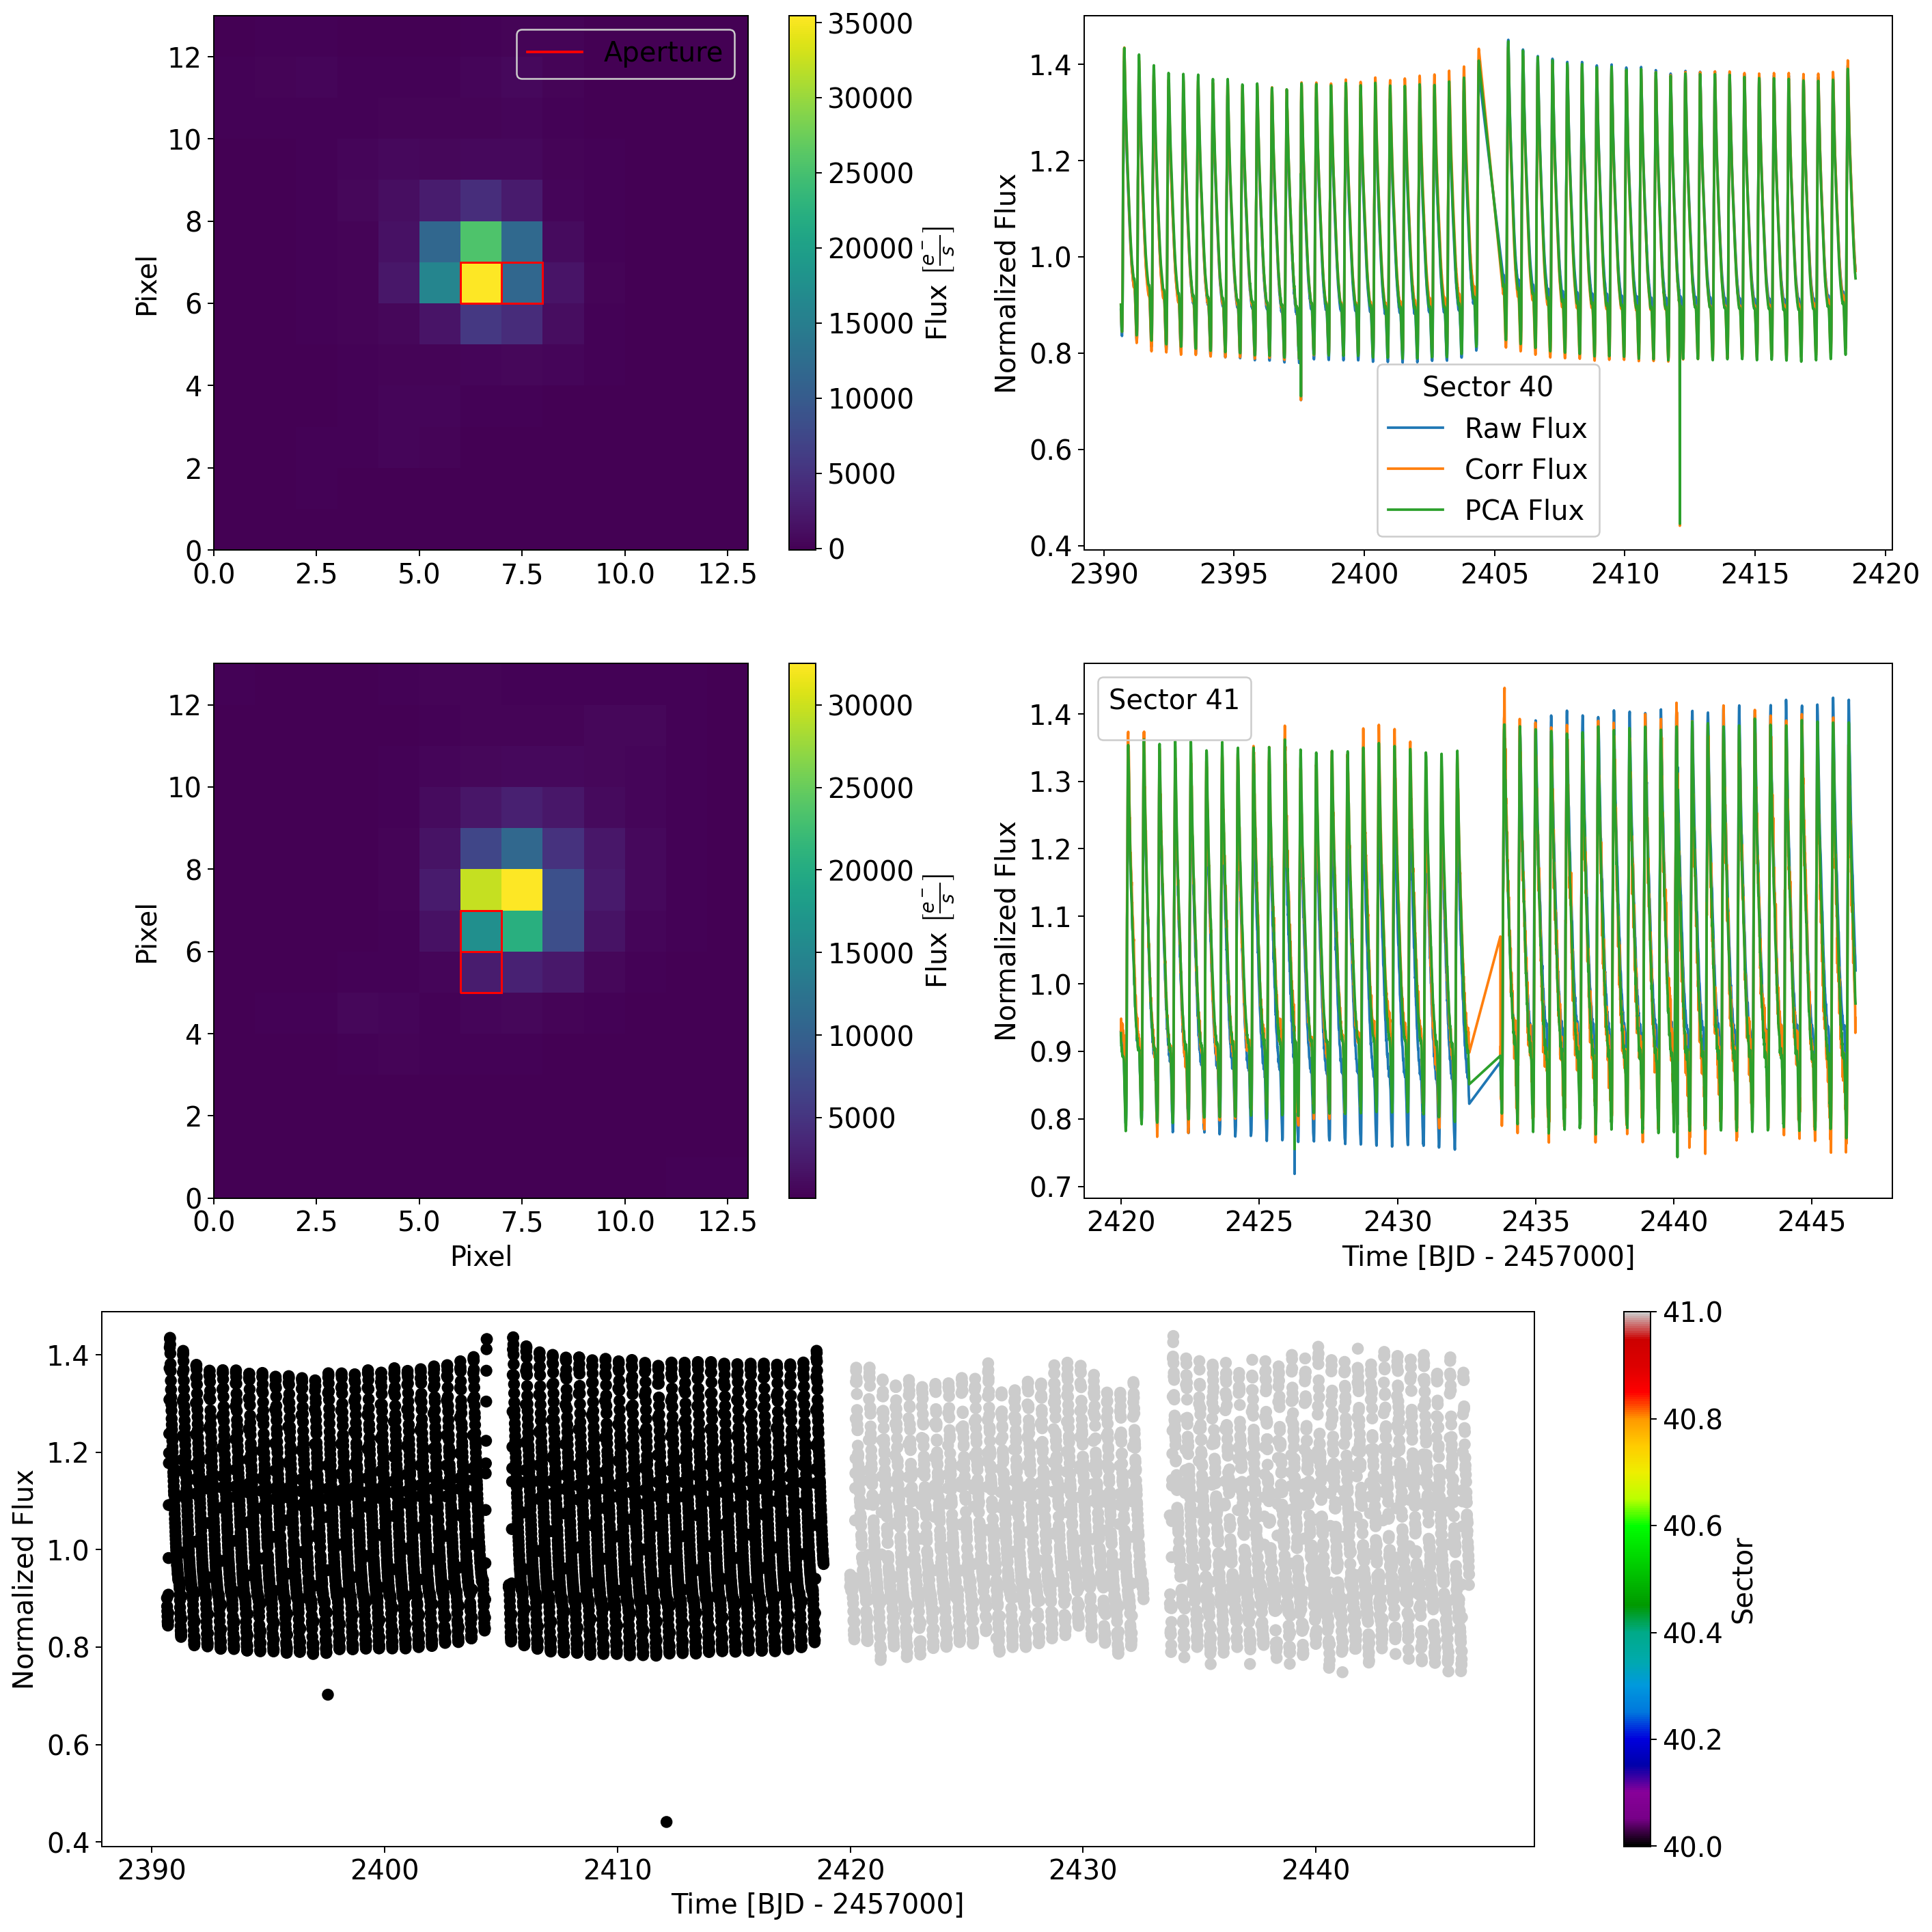

,tic,gaia,ra,dec,sector,tess_mag,aperture_size,chip,camera
0,159717514,2125982599343482624,291.366301,42.784359,40,16.6105,2.0,4,2
1,159717514,2125982599343482624,291.366301,42.784359,41,16.6105,2.0,3,2


In [7]:
t2plot = 0
fig, axs = EDI.plot_result(
    lcs=lcs[t2plot],
    tpfs=tpfs[t2plot],
    aperture_masks=aperture_masks[t2plot],
)

plt.show()

display(pd.DataFrame(metas[0]))